In [1]:
# Dependencies
import pandas as pd
import numpy as np
import os
import webbrowser
import io
import matplotlib
import matplotlib.pyplot as plt

In [2]:
IN_Data_csv = "Datasets/Indiana Retail Trade Data.csv"

In [3]:
# Read with pandas
IN_Data_df = pd.read_csv(IN_Data_csv)
IN_Data_df.head()

,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,"Range indicating percent of total sales, value of shipments, or revenue imputed",Range indicating percent of total annual payroll imputed,Range indicating percent of total employees imputed
0,0400000US18,NaN,Indiana,44-45,NaN,Retail trade,2017,12047,21327,102106020,8660066,2121834,336615,Less than 10%,10% to less than 20%,10% to less than 20%
1,0400000US18,NaN,Indiana,441,NaN,Motor vehicle and parts dealers,2017,2004,2818,23316901,1815912,432882,43510,Less than 10%,10% to less than 20%,10% to less than 20%
2,0400000US18,NaN,Indiana,442,NaN,Furniture and home furnishings stores,2017,719,996,1895350,244150,59599,8449,20% to less than 30%,10% to less than 20%,20% to less than 30%
3,0400000US18,NaN,Indiana,443,NaN,Electronics and appliance stores,2017,403,618,1485385,159721,38660,6337,Less than 10%,10% to less than 20%,10% to less than 20%
4,0400000US18,NaN,Indiana,444,NaN,Building material and garden equipment and sup...,2017,1153,1783,8856566,941172,233190,31961,Less than 10%,Less than 10%,Less than 10%


In [4]:
# Delete extraneous column
IN_Data_df = IN_Data_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])


IN_Data_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed"
0,Indiana,Retail trade,2017,12047,21327,102106020,Less than 10%
1,Indiana,Motor vehicle and parts dealers,2017,2004,2818,23316901,Less than 10%
2,Indiana,Furniture and home furnishings stores,2017,719,996,1895350,20% to less than 30%
3,Indiana,Electronics and appliance stores,2017,403,618,1485385,Less than 10%
4,Indiana,Building material and garden equipment and sup...,2017,1153,1783,8856566,Less than 10%
...,...,...,...,...,...,...,...
158,Indiana,All other miscellaneous store retailers (excep...,2017,364,435,441337,10% to less than 20%
159,Indiana,Electronic shopping and mail-order houses,2017,587,602,10435053,Less than 10%
160,Indiana,Vending machine operators,2017,84,96,251781,Less than 10%
161,Indiana,Fuel dealers,2017,85,169,463939,10% to less than 20%


In [11]:
IN_Data_df = IN_Data_df.replace({'D': '0'})
IN_Data_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed",eCommerce?
0,Indiana,Retail trade,2017,12047,21327,102106020,Less than 10%,0.0
1,Indiana,Motor vehicle and parts dealers,2017,2004,2818,23316901,Less than 10%,0.0
2,Indiana,Furniture and home furnishings stores,2017,719,996,1895350,20% to less than 30%,0.0
3,Indiana,Electronics and appliance stores,2017,403,618,1485385,Less than 10%,0.0
4,Indiana,Building material and garden equipment and sup...,2017,1153,1783,8856566,Less than 10%,0.0
...,...,...,...,...,...,...,...,...
158,Indiana,All other miscellaneous store retailers (excep...,2017,364,435,441337,10% to less than 20%,0.0
159,Indiana,Electronic shopping and mail-order houses,2017,587,602,10435053,Less than 10%,1.0
160,Indiana,Vending machine operators,2017,84,96,251781,Less than 10%,0.0
161,Indiana,Fuel dealers,2017,85,169,463939,10% to less than 20%,0.0


In [12]:
IN_Data_df.loc[IN_Data_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
IN_Data_df.loc[IN_Data_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

IN_Data_df.head()

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed",eCommerce?
0,Indiana,Retail trade,2017,12047,21327,102106020,Less than 10%,0.0
1,Indiana,Motor vehicle and parts dealers,2017,2004,2818,23316901,Less than 10%,0.0
2,Indiana,Furniture and home furnishings stores,2017,719,996,1895350,20% to less than 30%,0.0
3,Indiana,Electronics and appliance stores,2017,403,618,1485385,Less than 10%,0.0
4,Indiana,Building material and garden equipment and sup...,2017,1153,1783,8856566,Less than 10%,0.0


In [13]:
IN_Data_df['Sales, value of shipments, or revenue ($1,000)'] = IN_Data_df['Sales, value of shipments, or revenue ($1,000)'].astype(float)

In [16]:
ecommerce_totals = IN_Data_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()

In [17]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [ecommerce_totals[1.0], ecommerce_totals[0.0]]
colors = ["purple", "blue"]
explode = (0.3,0)

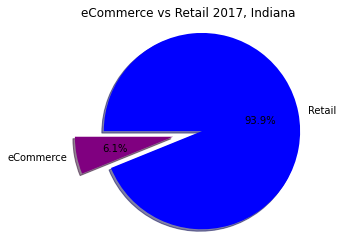

In [18]:
# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Indiana")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

# Establishments

In [ ]:
IN_Data_df.loc[IN_Data_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
IN_Data_df.loc[IN_Data_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

IN_Data_df

In [19]:
IN_Data_df['Number of establishments'] = IN_Data_df['Number of establishments'].astype(float)

In [21]:
establishments_total = IN_Data_df.groupby('eCommerce?')['Number of establishments'].sum()

In [22]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [establishments_total[1.0], establishments_total[0.0]]
colors = ["pink", "green"]
explode = (0.3,0)

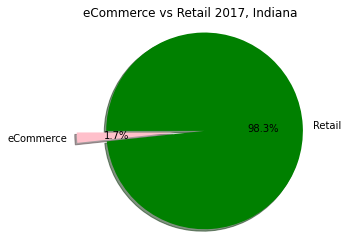

In [23]:
# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Indiana")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")